### ONLY run this cell once, then the kernel will automatically restart runtime. You can run the 2nd cell without run this cell again 

In [1]:
!pip install tesseract-ocr
!pip install pytesseract
!pip install --ignore-installed Pillow==9.0.0
!pip install fpdf

from IPython.display import clear_output

  Using cached tesseract-ocr-0.0.1.tar.gz (33 kB)
  Running setup.py clean for tesseract-ocr
Failed to build tesseract-ocr
    Running setup.py install for tesseract-ocr: started
    Running setup.py install for tesseract-ocr: finished with status 'error'


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\lenovo\anaconda3\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\lenovo\\AppData\\Local\\Temp\\pip-install-11mfjct6\\tesseract-ocr_a0714459783340788a443304ead726f6\\setup.py'"'"'; __file__='"'"'C:\\Users\\lenovo\\AppData\\Local\\Temp\\pip-install-11mfjct6\\tesseract-ocr_a0714459783340788a443304ead726f6\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\lenovo\AppData\Local\Temp\pip-wheel-3d7im9bo'
       cwd: C:\Users\lenovo\AppData\Local\Temp\pip-install-11mfjct6\tesseract-ocr_a0714459783340788a443304ead726f6\
  Complete output (8 lines):
  running bdist_wheel
  running build
  running build_py
  file tesseract_ocr.py (for module tesseract_ocr) not found
  file tesseract_ocr.py (for module tesseract_ocr) not found
  running build_ext

  Using cached Pillow-9.0.0-cp38-cp38-win_amd64.whl (3.2 MB)


In [2]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


### Program section

In [4]:
from fpdf import FPDF
from IPython.display import clear_output
import os
import cv2 as cv
import matplotlib.pyplot as plt
import ipywidgets as widgets
import numpy as np
import pytesseract
import shutil
import random
try:
    from PIL import Image
except ImportError:
    import Image

clear_output()

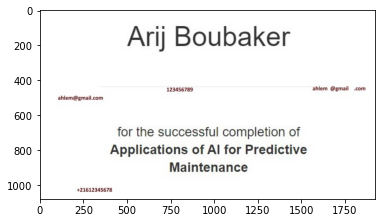

In [5]:
# Upload Image file

newname = "b.jpg"

filetype = newname.split('.')[-1]
oldname = "card_img." + filetype

path = newname

# initialize Variable
widthImg = 1920
heightImg = 1080
lower = 100
upper = 150
kernel = np.ones((5,5)) 
NAME = ""
ROLE = ""
COMPANY = ""
EMAIL = ""
PHONE = ""
WEBSITE = ""
ADDRESS = ""

# Read uploaded image
img_card = cv.imread("b.jpg")
img_card = cv.resize(img_card, (widthImg, heightImg), interpolation = cv.INTER_AREA)
img_card = cv.cvtColor(img_card, cv.COLOR_BGR2RGB)


# 1 convert to gray image
imgGray = cv.cvtColor(img_card, cv.COLOR_RGB2GRAY)

# 2 apply gaussian blur
imgBlur = cv.GaussianBlur(imgGray, (5, 5), 1)

plt.imshow(img_card)

IntSlider(value=100, description='lower threshold:', max=255)

IntSlider(value=150, description='upper threshold:', max=255)

Button(button_style='success', description='Canny Edge Detect', style=ButtonStyle(), tooltip='Click me')

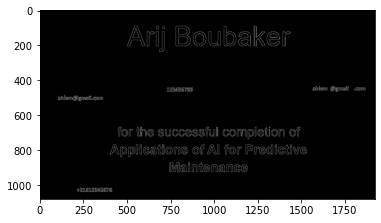

In [6]:
def threshBar():

  threshBar.btn = widgets.Button(description = 'Canny Edge Detect',disabled = False,button_style = 'success',tooltip = 'Click me',)

  threshBar.lowerThresh = widgets.IntSlider(value=100, min=0,
                         max=255,
                          step=1,
                          description='lower threshold:',
                          disabled=False,
                          continuous_update=True,
                          orientation='horizontal',
                          readout=True,
                          readout_format='d'
                      )
  threshBar.upperThresh = widgets.IntSlider(
                          value=150,
                          min=0,
                          max=255,
                          step=1,
                          description='upper threshold:',
                          disabled=False,
                          continuous_update=True,
                          orientation='horizontal',
                          readout=True,
                          readout_format='d'
                          )

  def btn_clicked(b):
    global lower
    global upper
    lower = threshBar.lowerThresh.value
    upper = threshBar.upperThresh.value
    clear_output()
    display(threshBar.lowerThresh)
    display(threshBar.upperThresh)
    display(threshBar.btn)
    print("Lower thresh = {}".format(lower))
    print("Upper thresh = {}".format(upper))
    imgThreshold = cv.Canny(imgBlur, lower, upper)
    plt.imshow(imgThreshold, cmap = 'gray', vmin=0, vmax=255)

  threshBar.btn.on_click(btn_clicked)
  display(threshBar.lowerThresh)
  display(threshBar.upperThresh)
  display(threshBar.btn)
  imgThreshold = cv.Canny(imgBlur, lower, upper)
  plt.imshow(imgThreshold, cmap = 'gray', vmin=0, vmax=255)

# // Adjust lower and upper threshold value from int sliders //
threshBar()

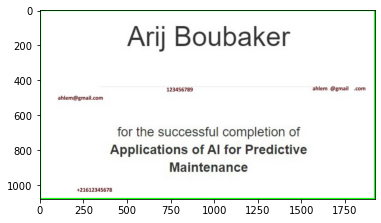

In [7]:
# 3 Apply Canny Edge detection
imgThreshold = cv.Canny(imgBlur, lower, upper)

# 4 Apply Dilation
imgDial = cv.dilate(imgThreshold, kernel, iterations=2)

# 5 Apply Erosion
imgErode = cv.erode(imgDial, kernel, iterations=1)

# 6 Find Contour
contours, hierarchy = cv.findContours(imgBlur, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# // Draw all Contour //
imgContours = img_card.copy()
cv.drawContours(imgContours, contours, -1, (0, 255, 0), 10)
plt.imshow(imgContours)

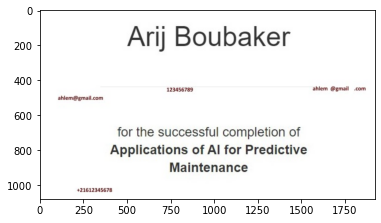

In [8]:
# 7 Find biggest Contour
biggest = np.array([])
max_area = 0
for i in contours:
    area = cv.contourArea(i)
    if area > 5000:
        peri = cv.arcLength(i, True)
        approx = cv.approxPolyDP(i, 0.02 * peri, True)
        if area > max_area and len(approx) == 4:
            biggest = approx
            max_area = area
        else:
            print("no")

# 8 Reorder 4 points of contour's corner
myPoints = biggest      
myPoints = myPoints.reshape((4, 2))
myPointsNew = np.zeros((4, 1, 2), dtype=np.int32)
add = myPoints.sum(1)

myPointsNew[0] = myPoints[np.argmin(add)]
myPointsNew[3] =myPoints[np.argmax(add)]
diff = np.diff(myPoints, axis=1)
myPointsNew[1] =myPoints[np.argmin(diff)]
myPointsNew[2] = myPoints[np.argmax(diff)]
biggest_new = myPointsNew

# 9 Perform Perspective crop
pts1 = np.float32(biggest_new)
pts2 = np.float32([[0, 0],[widthImg, 0], [0, heightImg], [widthImg, heightImg]])
matrix = cv.getPerspectiveTransform(pts1, pts2)
imgWarp = cv.warpPerspective(img_card, matrix, (widthImg, heightImg))
imgWarp = cv.resize(imgWarp, (widthImg, heightImg),interpolation = cv.INTER_AREA)
img_temp = imgWarp.copy()
img_temp = cv.cvtColor(img_temp, cv.COLOR_RGB2BGR)
cv.imwrite('colored_img.jpg', img_temp)

plt.imshow(imgWarp)

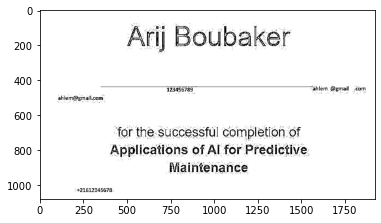

In [9]:
# // Convert cropped image to gray scale //
imgWarp = cv.cvtColor(imgWarp,cv.COLOR_RGB2GRAY)

# 10 Apply adaptive threshold
imgAdaptiveThre = cv.adaptiveThreshold(imgWarp, 255, 1, 1, 7, 2)
imgAdaptiveThre = cv.bitwise_not(imgAdaptiveThre)

# 11 Apply median blur
imgMed = cv.medianBlur(imgAdaptiveThre, 3)

cv.imwrite('scanned_card.jpg', imgMed) 
img_scan = cv.imread('scanned_card.jpg')
plt.imshow(img_scan)

In [12]:
# Extract text from card using google tesseract Optical character recognition
extractedInformation = pytesseract.image_to_string(Image.open('scanned_card.jpg'))

# Get rid of some OCR error text extraction
splt = extractedInformation.split('\n')
for i in range(len(splt)-1, -1, -1):
  if len(splt[i]) < 4:
    del splt[i]
  else:
    space = True
    for j in splt[i]:
      if j != ' ' and j != '\t':
        space = False
    if space:
      del splt[i]
splt.append('None')

In [13]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
nltk.download('stopwords')
from IPython import display
from collections import Counter
import math

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
Finance_List = ['facture', 'bon', 'cheque','devis']

HR_List = ['carte','identite','attestation']



all_stopwords = stopwords.words('english')
all_stopwords.append('‘')
all_stopwords.append('“')
all_stopwords.append('’')
all_stopwords.append(',')
all_stopwords.append('.')
all_stopwords.append('”')

all_stopwords.append('second')
all_stopwords.append('first')
all_stopwords.append('third')
all_stopwords.append('me')
all_stopwords.append('us')
all_stopwords.append('I')
all_stopwords.append('he')
all_stopwords.append('she')
all_stopwords.append('they')
all_stopwords.append('we')

names_lower=[]
for name in splt:
    names_lower.append(name.lower())

In [16]:
tokens_without_sw = [word for word in names_lower if not word in all_stopwords]
new_text = " ".join(tokens_without_sw)
new_text

'123456785 “ahlem @gmail com ahlem@ginail.com: ) . | applications of al for predictive maintenance oh21612345673- none'

In [25]:
counter_data_set = Counter(tokens_without_sw)
counter_HR_List = Counter(HR_List)
counter_Finance_List = Counter(Finance_List)



def counter_cosine_similarity(c1, c2):
    terms = set(c1).union(c2)
    dotprod = sum(c1.get(k, 0) * c2.get(k, 0) for k in terms)
    magA = math.sqrt(sum(c1.get(k, 0)**2 for k in terms))
    magB = math.sqrt(sum(c2.get(k, 0)**2 for k in terms))
    return dotprod / (magA * magB)

def length_similarity(c1, c2):
    lenc1 = sum(c1.values())
    lenc2 = sum(c2.values())
    return min(lenc1, lenc2) / float(max(lenc1, lenc2))

def similarity_score(l1, l2):
    c1, c2 = Counter(l1), Counter(l2)
    return length_similarity(c1, c2) * counter_cosine_similarity(c1, c2)


counter_cosine_similarity_HR_List = counter_cosine_similarity(counter_data_set, counter_HR_List)
counter_cosine_similarity_Finance_List = counter_cosine_similarity(counter_data_set, counter_Finance_List)


Rst_HR_List = similarity_score(tokens_without_sw,HR_List) + counter_cosine_similarity_HR_List

Rst_Finance_List = similarity_score(tokens_without_sw,Finance_List) + counter_cosine_similarity_Finance_List

"""###**validation method**"""

rst = []
rst.append(Rst_HR_List)
rst.append(Rst_Finance_List)

ch = "No Department Detected"

if max(rst) == Rst_HR_List :
  ch = "HR Department"

elif max(rst) == Rst_Finance_List :
  ch = "Finance Department"

else:
    ch = "No Department Detected"


print(ch)

Finance Department
